# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# All Chromosomes

# Modules

In [12]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# from sklearn.externals import joblib!!!
import joblib
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

In [13]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [14]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.12~A30.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.12~A49.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.13~A20.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.13~A40.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.4~A49.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.12~A13.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.12~A16.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.12~A27.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.13~A28.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.14~A18.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.1~A31.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.2~A18.K_9R.png',
   'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.2~A40

In [15]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [16]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.12~A30.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.12~A49.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.13~A20.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.13~A40.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.14~A16.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.2~A23.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.2~A27.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171303.4~A49.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.12~A13.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.12~A16.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.12~A27.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.13~A18.K_9R.png',
  'F:\\MyProject\\MachineLearning\\Mydata\\chr_09\\171344.13~A28.K_9R.png',
  'F:

# Iteration Starts Here:

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [17]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_09
   Train: 
        171303.12~A30.K_9R.png
        171303.12~A49.K_9R.png
        171303.13~A20.K_9R.png
        171303.13~A40.K_9R.png
        171303.4~A49.K_9R.png
        171344.12~A13.K_9R.png
        171344.12~A16.K_9R.png
        171344.12~A27.K_9R.png
        171344.13~A28.K_9R.png
        171344.14~A18.K_9R.png
        171344.1~A31.K_9R.png
        171344.2~A18.K_9R.png
        171344.2~A40.K_9R.png
        171344.4~A14.K_9R.png
        171524.12~A16.K_9R.png
        171524.12~A25.K_9R.png
        171524.13~A36.K_9R.png
        171524.4~A35.K_9R.png
        171661.12~A1.K_9R.png
        171661.13~A17.K_9R.png
        171661.13~A35.K_9R.png
        171661.13~A9.K_9R.png
        171661.14~A32.K_9R.png
        171787.14~A12.K_9R.png
        171787.2~A45.K_9R.png
        171787.3~A3.K_9R.png
        171787.4~A10.K_9R.png
        172086.14~A4.K_9R.png
        172086.2~A24.K_9R.png
        172086.3~A4.K_9R.png
        172086.4~A17.K_9R.png
        172086.4~A30.

### 3.1.1. Helper Functions

In [18]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            # r, g, b = image.getpixel((j, i))！！！
            pixel = image.getpixel((j, i))
            r, g, b = pixel[:3]    # 不管是 RGB 还是 RGBA，都只取前面三项            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [19]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [20]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

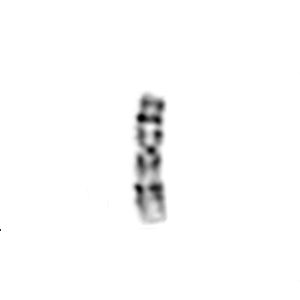

In [21]:
image['chr_09'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [22]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Train 2D to 1D

In [23]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [24]:
x_train_list = []
y_train_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [25]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [26]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

#### Test 2D to 1D

In [27]:
data_flat = {}

for chrNo in data.keys():
    data_flat[chrNo] = []
    for case in data[chrNo]:
        case_flat = []
        for row in case:
            for column in row:
                case_flat.append(column)            
        data_flat[chrNo].append(case_flat)

In [28]:
x_test_list = []
y_test_list = []

for y, x in data_flat.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [29]:
chromConvert = {
               'chr_09': 0,                
                'chr_9_inversion': 1
               }

In [30]:
chromConvert_reverse = {0: 'chr_09',
                        1: 'chr_9_inversion'
               }

In [31]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [32]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [33]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [34]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [35]:
len(X_train)

800

In [36]:
X_train[0].shape

(90000,)

## 3.2. Support Vector Machine

In [37]:
start = time.time()



clf = svm.SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X_train, y_train)

end = time.time()

In [38]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 5.55653613e-19  5.55653613e-19  5.55653613e-19 ... -7.25525514e-05
  -6.30204335e-05 -4.13859618e-05]]
b =  [2.708814]
Indices of support vectors =  [  0   7   8  11  15  20  31  38  44  46  60  62  68  69  77  78  85  92
  93  97 107 122 131 132 134 143 153 158 161 162 171 174 177 179 180 190
 195 197 199 202 206 208 211 214 215 216 221 222 230 238 251 255 261 267
 269 270 273 280 281 286 290 301 311 318 343 344 346 351 352 359 362 368
 371 381 384 385 391 396 400 432 437 441 446 449 472 477 478 493 504 523
 538 545 547 564 565 571 572 575 577 581 586 587 588 593 595 599 601 602
 604 609 610 612 619 624 625 630 631 640 642 644 652 663 665 667 668 670
 693 696 701 702 715 730 732 733 736 740 742 745 746 757 768 772 796]
Support vectors =  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
Number of suppo

## 3.8 Save the Model

In [39]:
c = joblib.dump(clf, 'model_allClass_svm_iteration_'+str(iterationNumber))
print(c)

['model_allClass_svm_iteration_0']


## 3.9 Load the Model

In [40]:
model_reload = joblib.load('model_allClass_svm_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [41]:
acc = model_reload.score(X_test, y_test)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.921


In [42]:
len(X_test)

202

In [43]:
y_predict = model_reload.predict(X_test)

In [44]:
len(y_predict)

202

# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(32):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [45]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.2. Classification Report

In [46]:
performanceReport = classification_report(y_test, y_predict, target_names=label_convert)

# Change here for different iteration!!!!!

print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.93      0.91      0.92       101
chr_9_inversion       0.91      0.93      0.92       101

       accuracy                           0.92       202
      macro avg       0.92      0.92      0.92       202
   weighted avg       0.92      0.92      0.92       202



### 3.10.3. Confusion Matrix

In [47]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,92,9
chr_9_inversion,7,94


### 3.10.4 Rate of Confusion Matrix

In [48]:
subtotal = [0] * 2 
for item in y_test:
    subtotal[item] = subtotal[item] + 1

In [49]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [50]:
cm_array = np.array(cm_r)

In [51]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Rate_KaryoType_SVM' + str(iterationNumber) + '.csv')
confusion_r

,chr_09,chr_9_inversion
chr_09,0.910891,0.089109
chr_9_inversion,0.069307,0.930693


#### Heat Map: Number

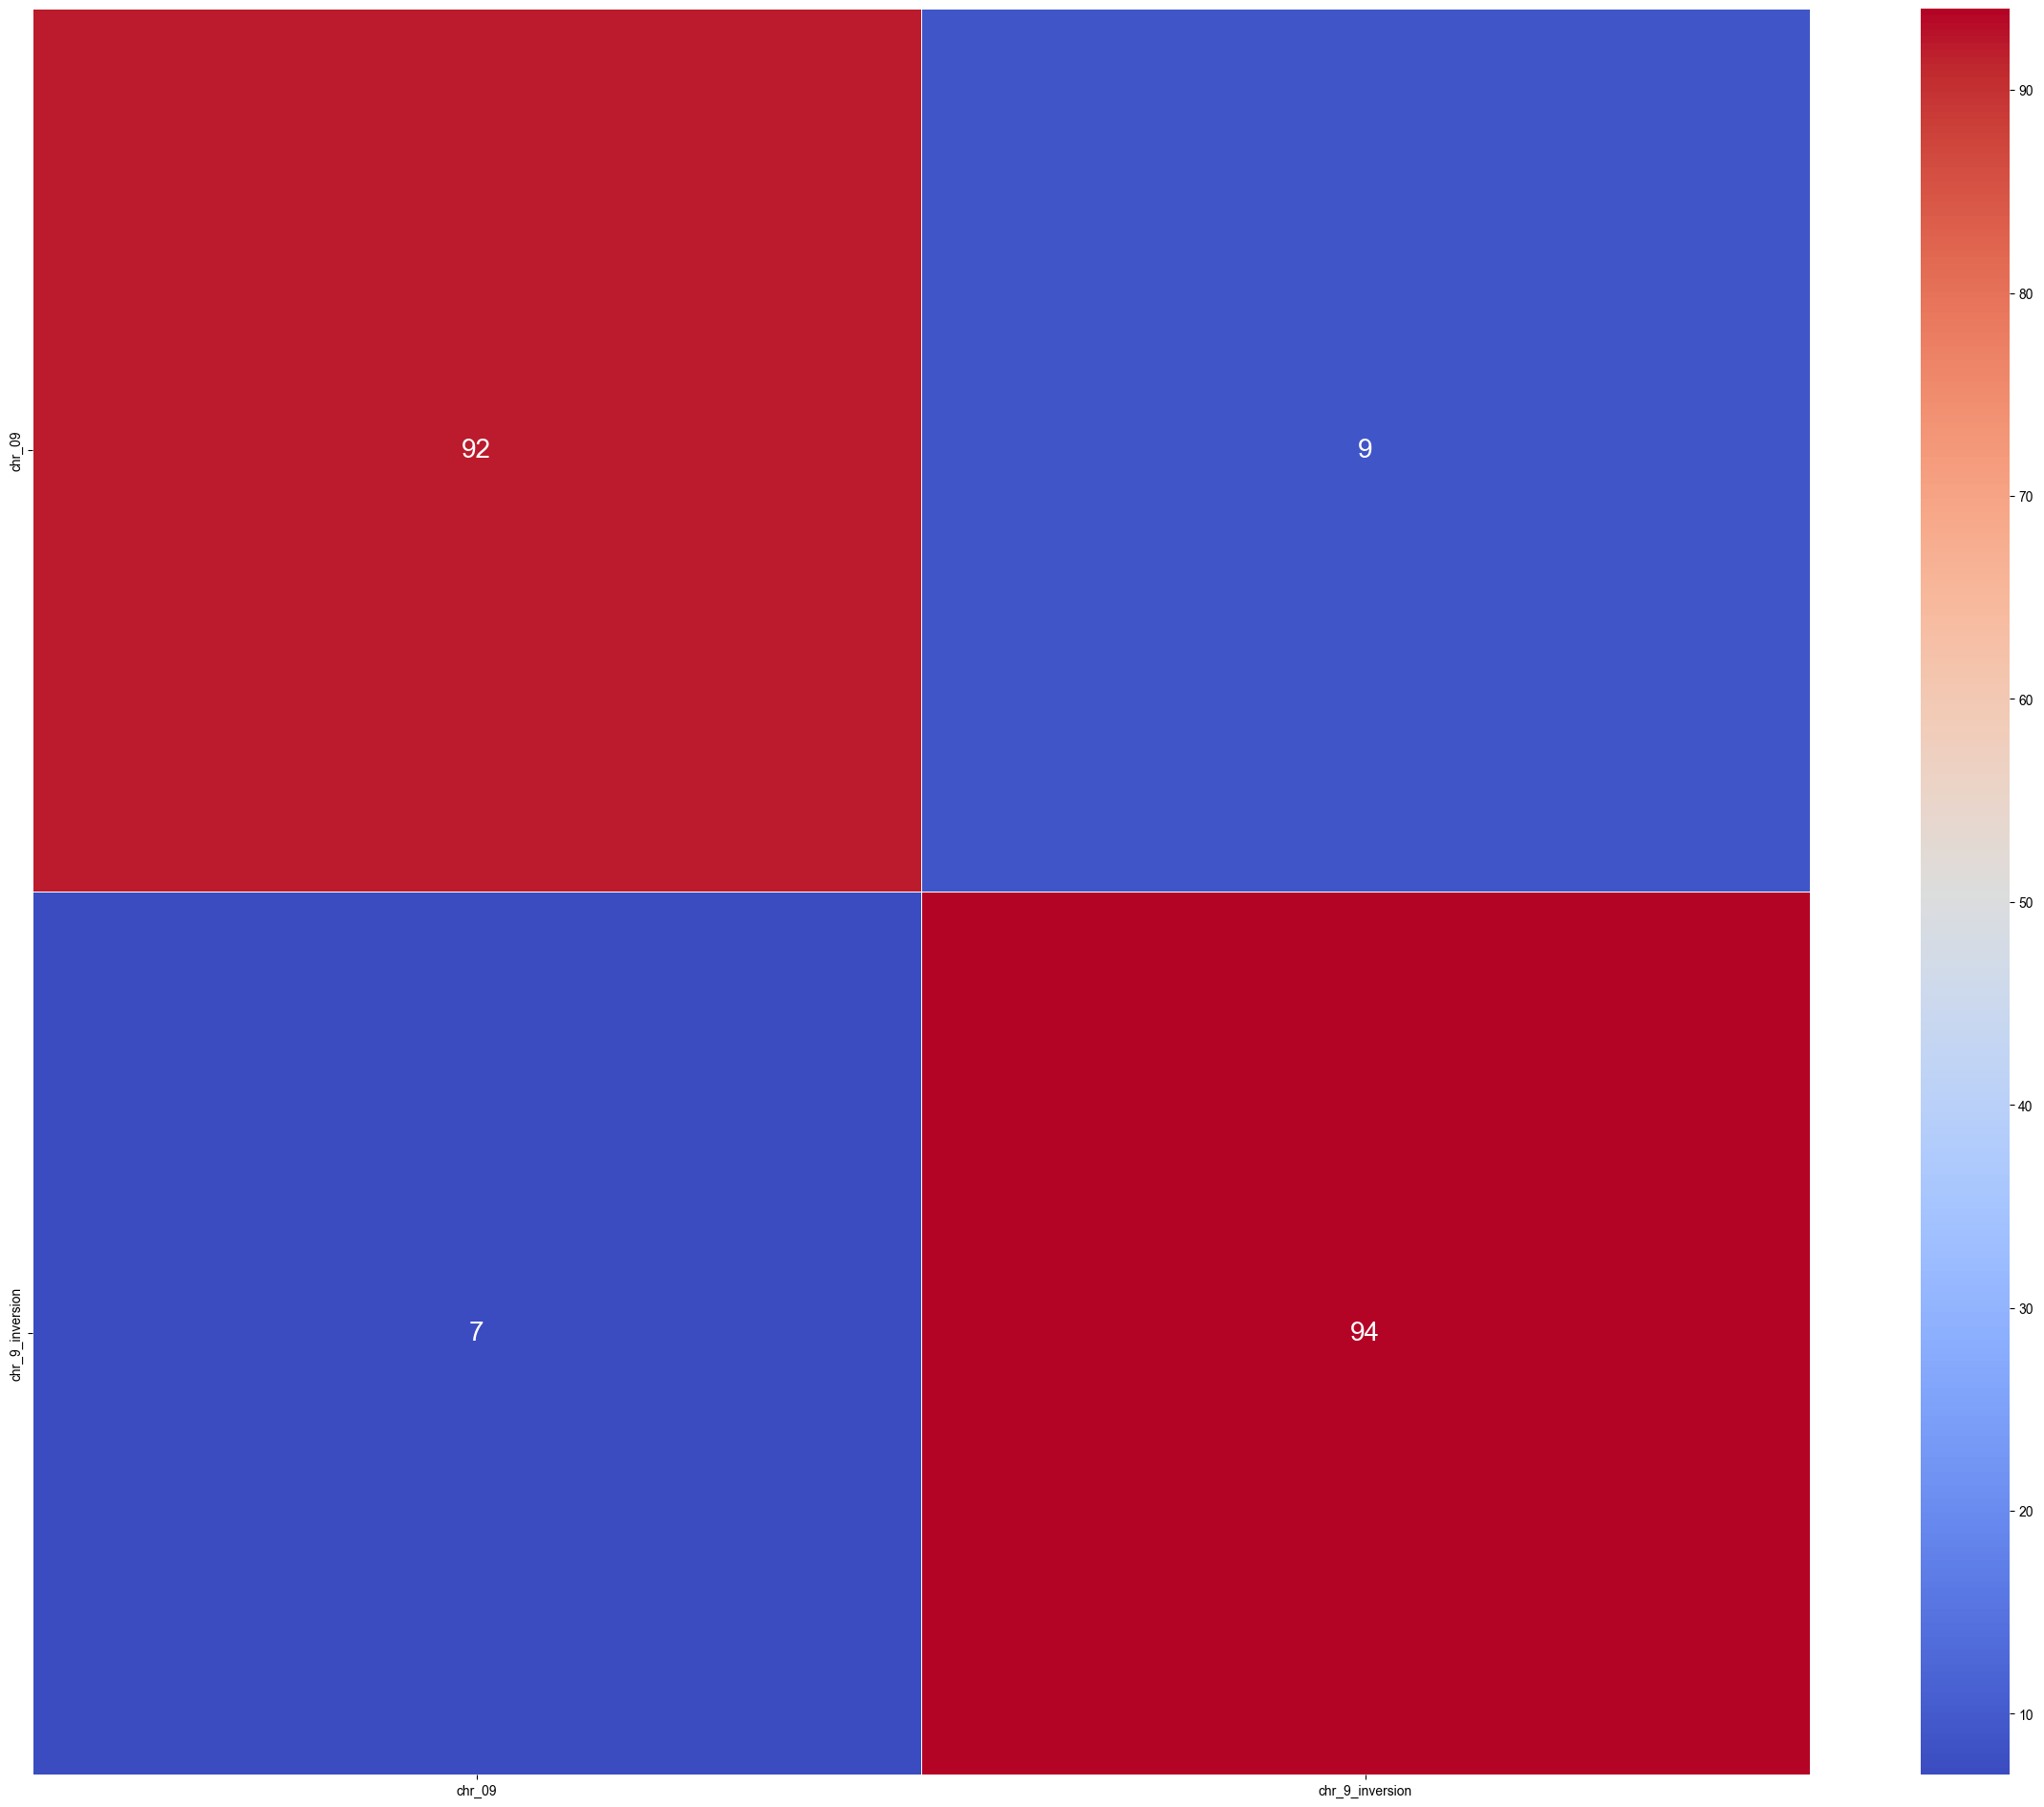

In [52]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map: Rate (important!!!)

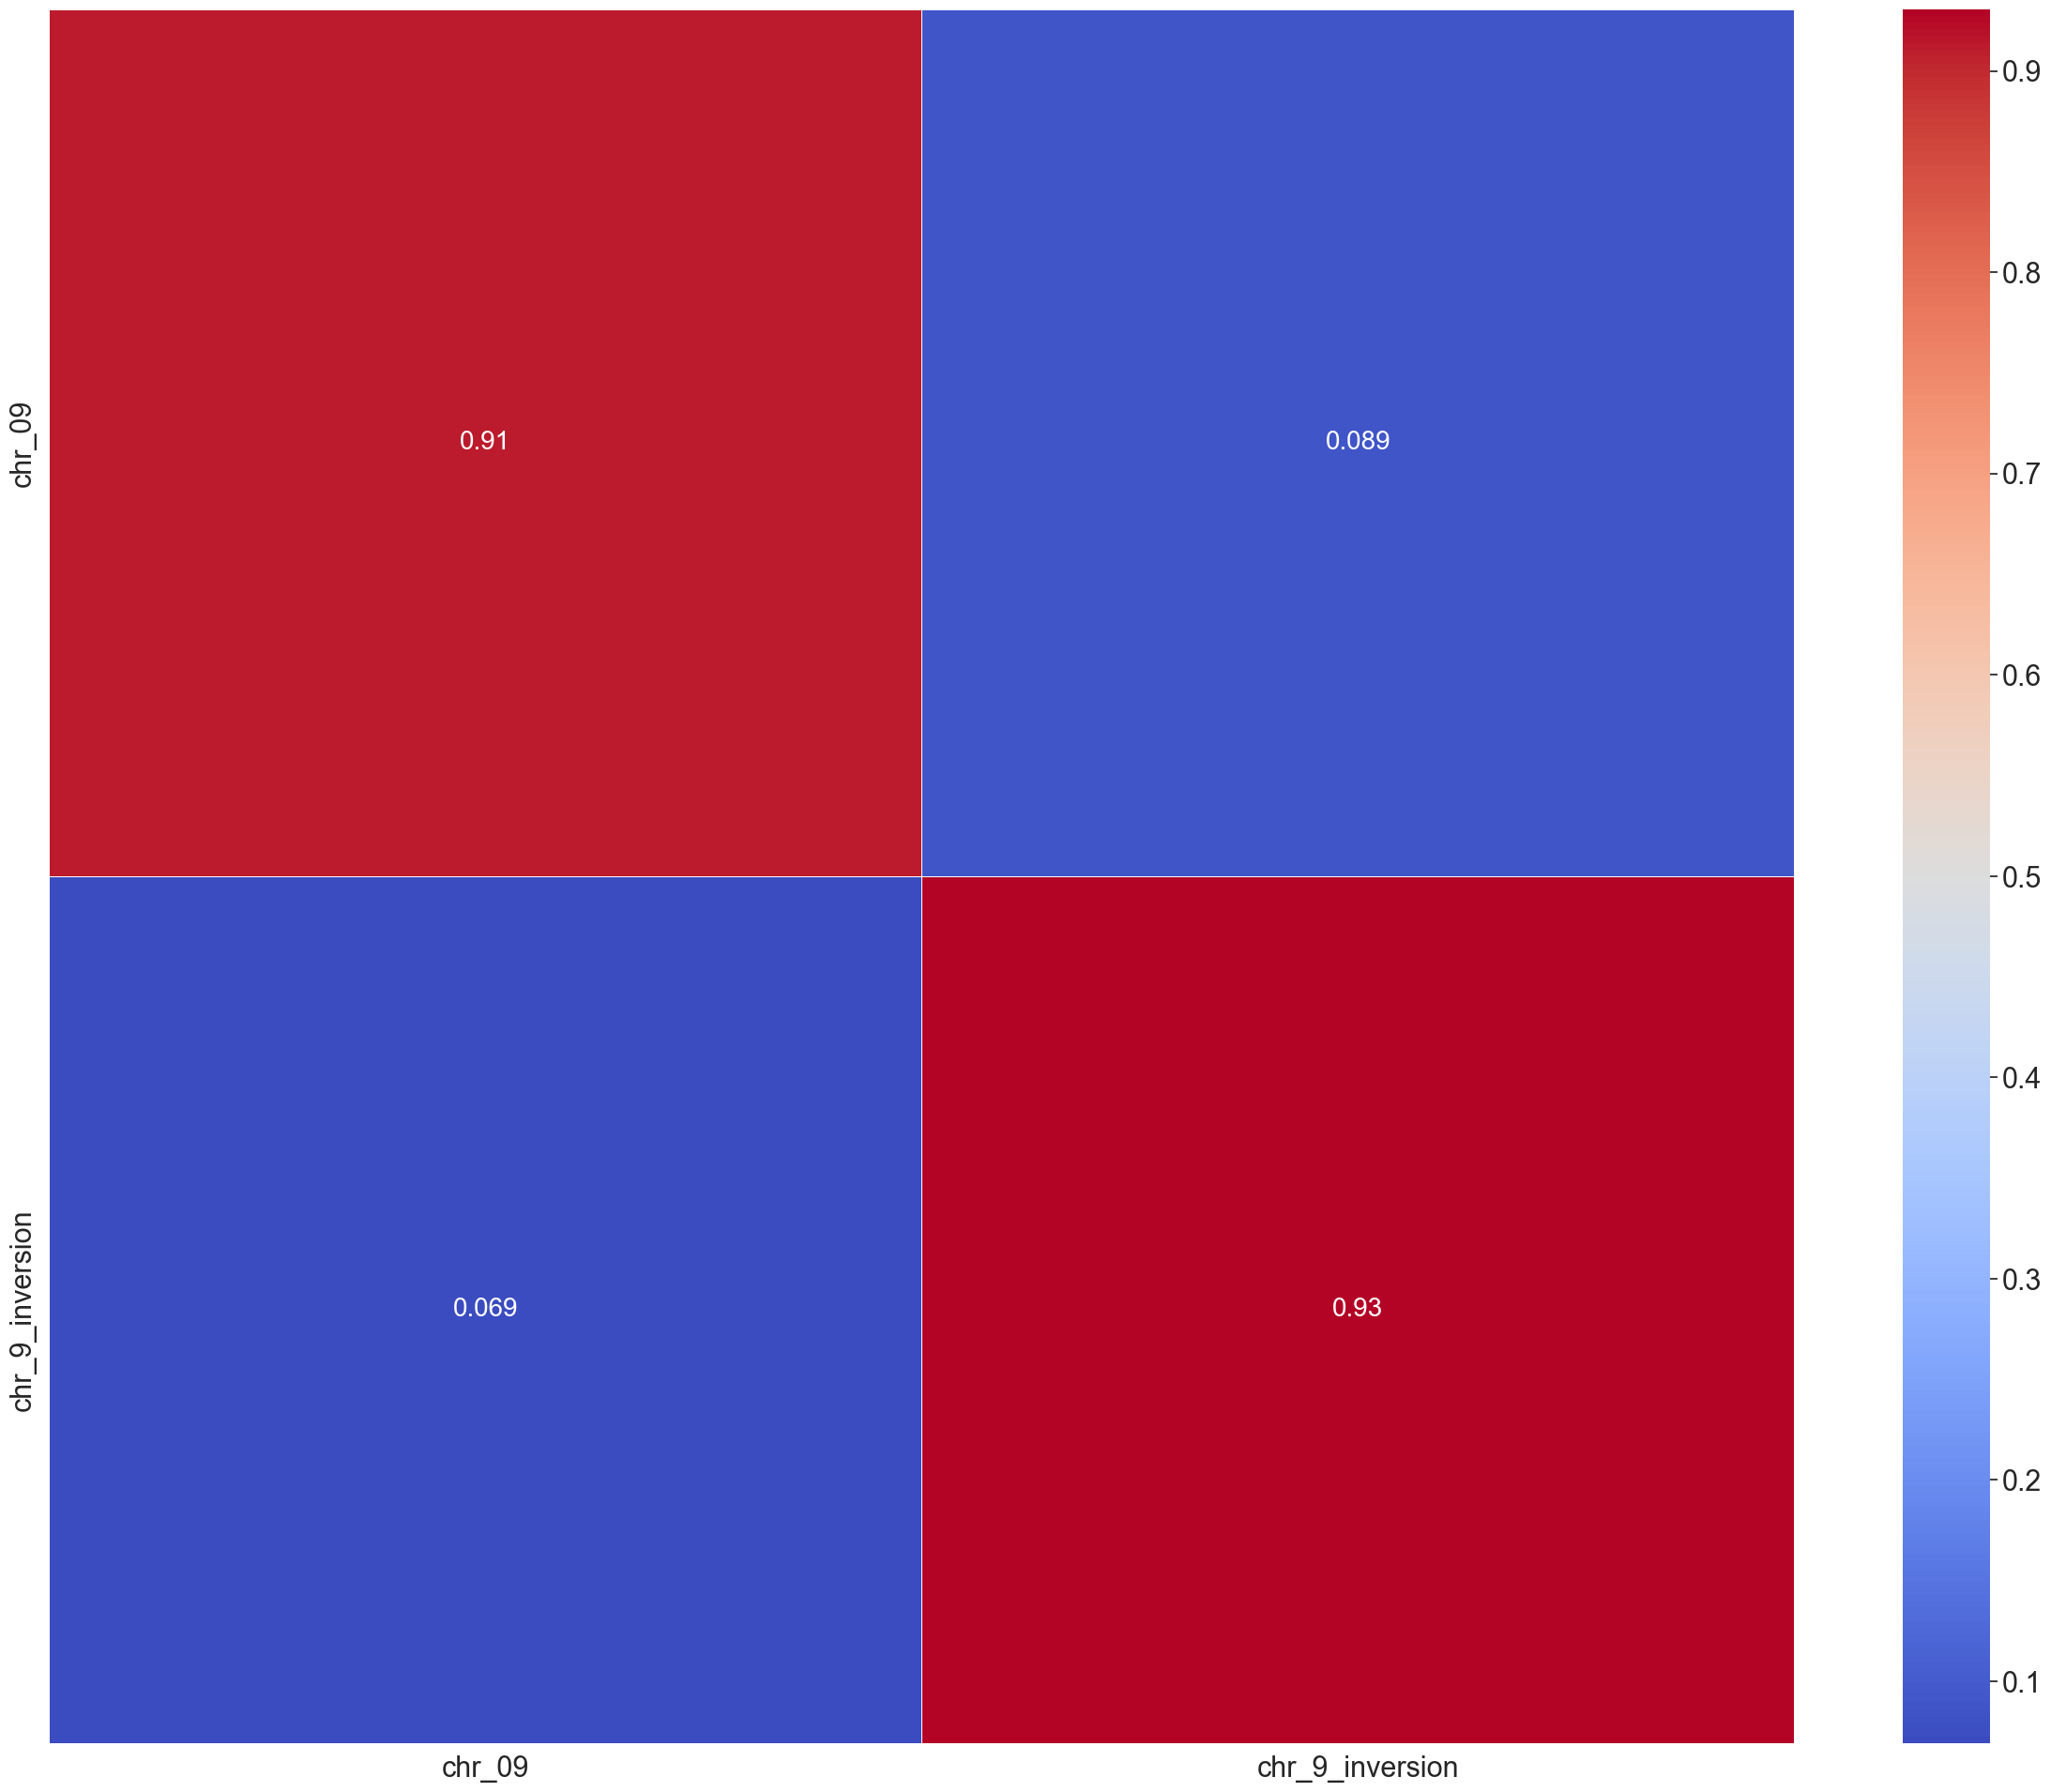

In [53]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Iteration_' + str(iterationNumber) + '.png', dpi=400)

In [55]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Rate_Iteration_' + str(iterationNumber) + '.png', dpi=400)

# Results

In [56]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.921


In [57]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.93      0.91      0.92       101
chr_9_inversion       0.91      0.93      0.92       101

       accuracy                           0.92       202
      macro avg       0.92      0.92      0.92       202
   weighted avg       0.92      0.92      0.92       202



In [58]:
type(performanceReport)

str

In [59]:
confusion

,chr_09,chr_9_inversion
chr_09,92,9
chr_9_inversion,7,94


## Export to a text file

In [60]:
file_report = open('Results_'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()